# Forecasting Google Stock with Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import and make the date column the index
df = pd.read_csv('Google_Stock.csv', index_col = 'Date')

# Create a datetidex
df.index = pd.to_datetime(df.index)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.323915,44659000.0
2004-08-20,54.322689,0.710922,6.739913,22834300.0
2004-08-23,54.869377,3.729433,-1.243144,18256100.0
2004-08-24,52.597363,6.417469,-6.074187,15247300.0
2004-08-25,53.164113,1.886792,1.169811,9188600.0


Let's create a 'Label' column which will contain the values which we are trying to predict. We will use the **.shift()** method to shift the values in the 'Adj. Close' column the number of spaces specified in the 'forecast_out' variable.

The image below showa an example of how the **.shift()** method works:

![](shift_example.png)

In [17]:
# Number of days to forecast
forecast_out = 60

# Shift 'forecast' up the amout of forecast_out in order to predict that many days into the future
df['Label'] = df['Adj. Close'].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,Label
Date,,,,,
2004-08-19,50.322842,3.712563,0.323915,44659000.0,91.281778
2004-08-20,54.322689,0.710922,6.739913,22834300.0,92.721222
2004-08-23,54.869377,3.729433,-1.243144,18256100.0,86.539640
2004-08-24,52.597363,6.417469,-6.074187,15247300.0,86.517070
2004-08-25,53.164113,1.886792,1.169811,9188600.0,84.029391


Next we will remove the rows where the the 'Label' column was made NaN by the .shift() method and save them to forecast with later.

In [18]:
X = df.drop(['Label'], 1)

# Save the most recent 'forecast_out' days to forecast with later
X_lately = X[-forecast_out:]

# Remove the most recent 'forecast_out' days where we don't have labels
X = X[:-forecast_out]

# labels
y = df['Label'][:-forecast_out]

Here we will partition up the training and testing sets as well as fit our model.

In [19]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# partitioning up the training/testing data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

# regressor
regr = LinearRegression()

# Train the regressor
regr.fit(X_train, y_train)

# Calculate the accuracy of the model (squared error in this case)
accuracy = regr.score(X_test, y_test)

accuracy

0.96364194838245998

### Make a plot of the model's forecast

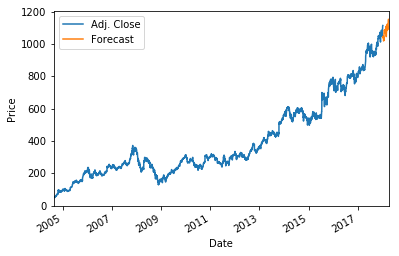

In [20]:
from pandas.tseries.offsets import BDay # This will allow us to get the next business
import matplotlib.pyplot as plt

# Predoct on X_lately to make the forecasted predictions
forecast_set = regr.predict(X_lately)

# The first buisness day after the last day in the dataset
first_forecast_day = df.index[-1] + BDay()

# Fill in the rest of the days for the forecast index
forecast_index = [first_forecast_day]
for i in range(1, forecast_out):
    forecast_index.append(forecast_index[i-1]+BDay())

# Combine the forecast index with the forecast values
forecast = pd.Series(forecast_set, index = forecast_index)

# plot
df['Adj. Close'].plot()
forecast.plot()
plt.legend(['Adj. Close', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()